In [1]:
import sys
import pickle
import photoshop.api as ps
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import os
from torch_geometric.data import Dataset, download_url, Data
import pandas as pd
import shutil
import torch
from IPython.display import clear_output
import umap
from random import randint

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input

from keras.applications.vgg16 import VGG16
from keras.models import Model

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.spatial import distance

ModuleNotFoundError: No module named 'photoshop'

In [1]:
model = VGG16()
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

NameError: name 'VGG16' is not defined

In [341]:
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [2]:
y = np.append(data["cluster"], np.array([0,1,2,3,4]), axis=0)

NameError: name 'np' is not defined

In [ ]:
x = np.array(x)

(132, 4096)

In [4]:
path = "C:\Austin\Projects\MS_Thesis_Data\General\Eyes\Raw_Lineart\extracted_jpgs"

In [96]:
eye_images = []
file_names = []
for img in os.listdir(path):
  file_names.append(img)
  img_arr=cv2.imread(os.path.join(path,img), cv2.IMREAD_COLOR)
  img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
  img_arr = cv2.resize(img_arr, (224,224))
  eye_images.append(np.array(img_arr))
    

In [97]:
eye_images = np.array(eye_images)
file_names = np.array(file_names)

In [98]:
print(eye_images.shape)
print(file_names.shape)


(127, 224, 224, 3)
(127,)


In [342]:
data = {"name":file_names, "image":eye_images, "features":[]}

In [343]:
data["image"][0].shape

(224, 224, 3)

In [344]:
for i in range(len(data["name"])):
    img = data["image"][i]
    img = img.reshape(1,224,224,3)
    img = preprocess_input(img)
    features = model.predict(img)
    data["features"].append(features)

1/1 [==============================] - 0s 145ms/step


In [407]:
n = 0
data["features"][0][0][:,:,n:n+3].shape

(14, 14, 3)

15


C:\Users\Austin Paulraj\AppData\Local\Temp\ipykernel_1940\411192204.py:2: RuntimeWarning: invalid value encountered in scalar divide
  plt.imshow(data["features"][0][0][:,:,n:n+3]-data["features"][0][0][:,:,n:n+3].min()/data["features"][0][0][:,:,n:n+3].max(), cmap="Greys")


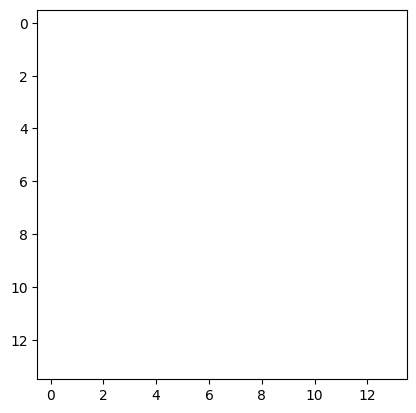

In [ ]:
print(n)
plt.imshow(data["features"][0][0][:,:,n:n+3]-data["features"][0][0][:,:,n:n+3].min()/data["features"][0][0][:,:,n:n+3].max(), cmap="Greys")
n=n+1

In [242]:
data["features"] = np.array(data["features"])

In [243]:
data["features"].shape

(127, 1, 224, 224, 64)

In [ ]:
data["features"] = data["features"].reshape(127,224, 224, 64)

In [250]:
n=0

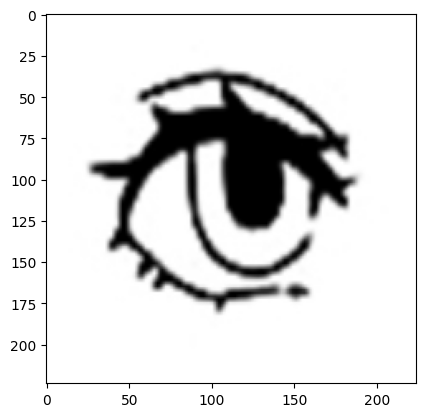

In [245]:
plt.imshow(eye_images[0])
plt.show()

fc63a7727c6fd9e36f964f7dcea3d04_0017_Layer 19.jpg
(224, 224, 3)
(1, 4096)


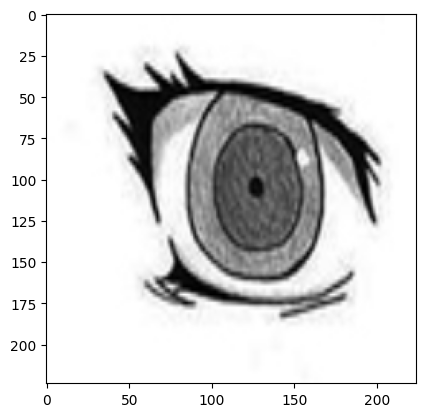

In [21]:
n = 123
print(data["name"][n])
plt.imshow(data["image"][n])
print(data["image"][n].shape)
print(data["features"][n].shape)
plt.show()

In [22]:
features = []
names = []
for i in range(len(data["features"])):
  features.append(data["features"][i])
  names.append(data["name"][i])

features = np.array(features)

In [23]:
features.shape

(127, 1, 4096)

In [24]:
features = features.reshape(-1,4096)
features.shape

(127, 4096)

In [ ]:
pca = PCA(n_components=100, random_state=22)
pca.fit(features)
x = pca.transform(features)
data["factor"]=x

In [26]:
data["factor"].shape

(127, 100)

In [27]:
x = np.array(data["image"].reshape([127,150528]))

In [32]:
data["features"] = np.array(data["features"]).reshape((127,4096))
x = data["features"]

In [29]:
x = data["factor"]

In [33]:
kmeans = KMeans(n_clusters=5, random_state=69)
kmeans.fit(x)

,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,69
,copy_x,True
,algorithm,'lloyd'


In [34]:
kmeans.cluster_centers_.shape

(5, 4096)

In [35]:
data["cluster"] = kmeans.labels_
data["centroids"] = kmeans.cluster_centers_

In [36]:
unique, counts = np.unique(data["cluster"], return_counts=True)
counts

array([30, 31, 21, 34, 11], dtype=int64)

In [37]:
print(data["cluster"].shape)
print(data["factor"].shape)

(127,)
(127, 100)


In [38]:
n=-1

0
2aae034ae1396720aa35cd47e91ef17a_0001_Layer 3.jpg
2
(224, 224, 3)
(4096,)
(100,)


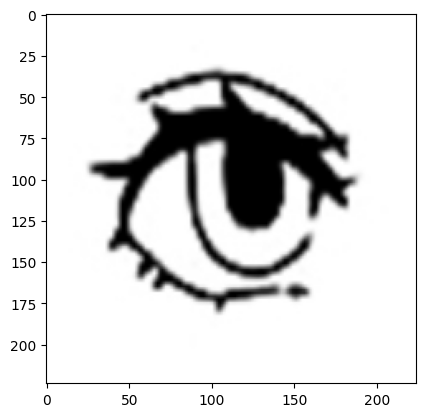

In [39]:
n=n+1
print(n)
print(data["name"][n])
print(data["cluster"][n])
print(data["image"][n].shape)
print(data["features"][n].shape)
print(data["factor"][n].shape)
plt.imshow(data["image"][n])
plt.show()

In [48]:
with open('C://Austin//Projects//MS_Thesis_Data//test_eye_clusters_extract.pk1', 'wb') as handle:
    pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [49]:
#BACKUP
with open('C://Austin//Projects//MS_Thesis_Data//test_eye_clusters_extract_backup.pk1', 'wb') as handle:
    pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL) # Last updated - Data Centroids added

In [25]:
temp_path = "C://Austin//Projects//MS_Thesis_Data//temp"

for i in range(len(data["cluster"])):
    clust_path = os.path.join(temp_path, str(data["cluster"][i]))
    if not os.path.exists(clust_path):
        os.mkdir(clust_path)
    else:
        im = Image.fromarray(data["image"][i])
        im.save(os.path.join(clust_path, data["name"][i]))
    


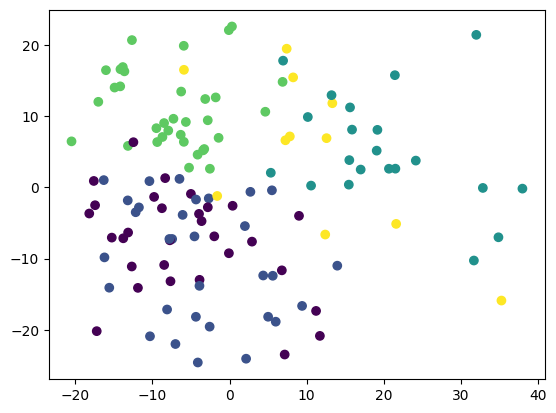

In [40]:
i = 0
x = [k[i] for k in data["factor"]]
y = [k[i+1] for k in data["factor"]]

plt.scatter(x,y,c=data["cluster"])
plt.show()

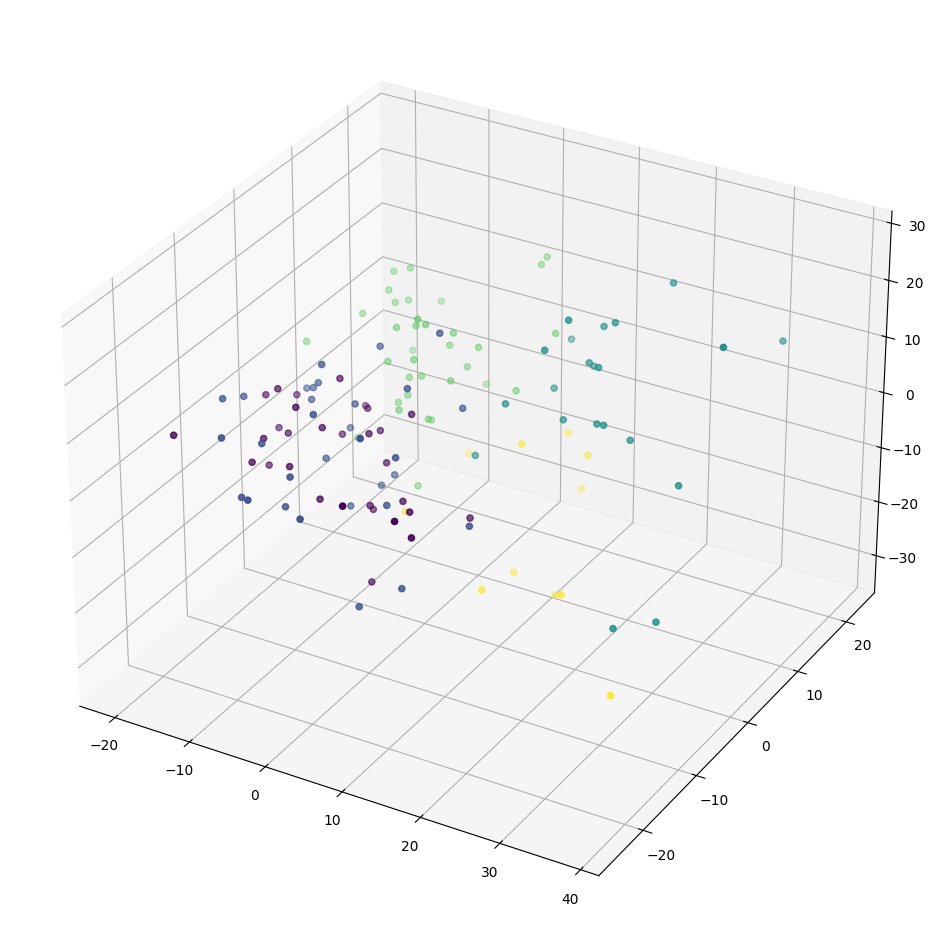

In [41]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

z = [k[i+2] for k in data["factor"]]

ax.scatter(x, y, z, c=data["cluster"])
plt.show()

In [42]:
reducer = umap.UMAP(
    n_components=3, n_neighbors=4, random_state=69, transform_seed=42, verbose=False
)

In [43]:
x = data["features"]

In [44]:
reducer.fit(x)

C:\Users\Austin Paulraj\AppData\Roaming\Python\Python310\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


,n_neighbors,4
,n_components,3
,metric,'euclidean'
,metric_kwds,None
,output_metric,'euclidean'
,output_metric_kwds,None
,n_epochs,None
,learning_rate,1.0
,init,'spectral'
,min_dist,0.1
,spread,1.0


In [45]:
embedding = reducer.transform(x)
assert(np.all(embedding == reducer.embedding_))
embedding.shape

(127, 3)

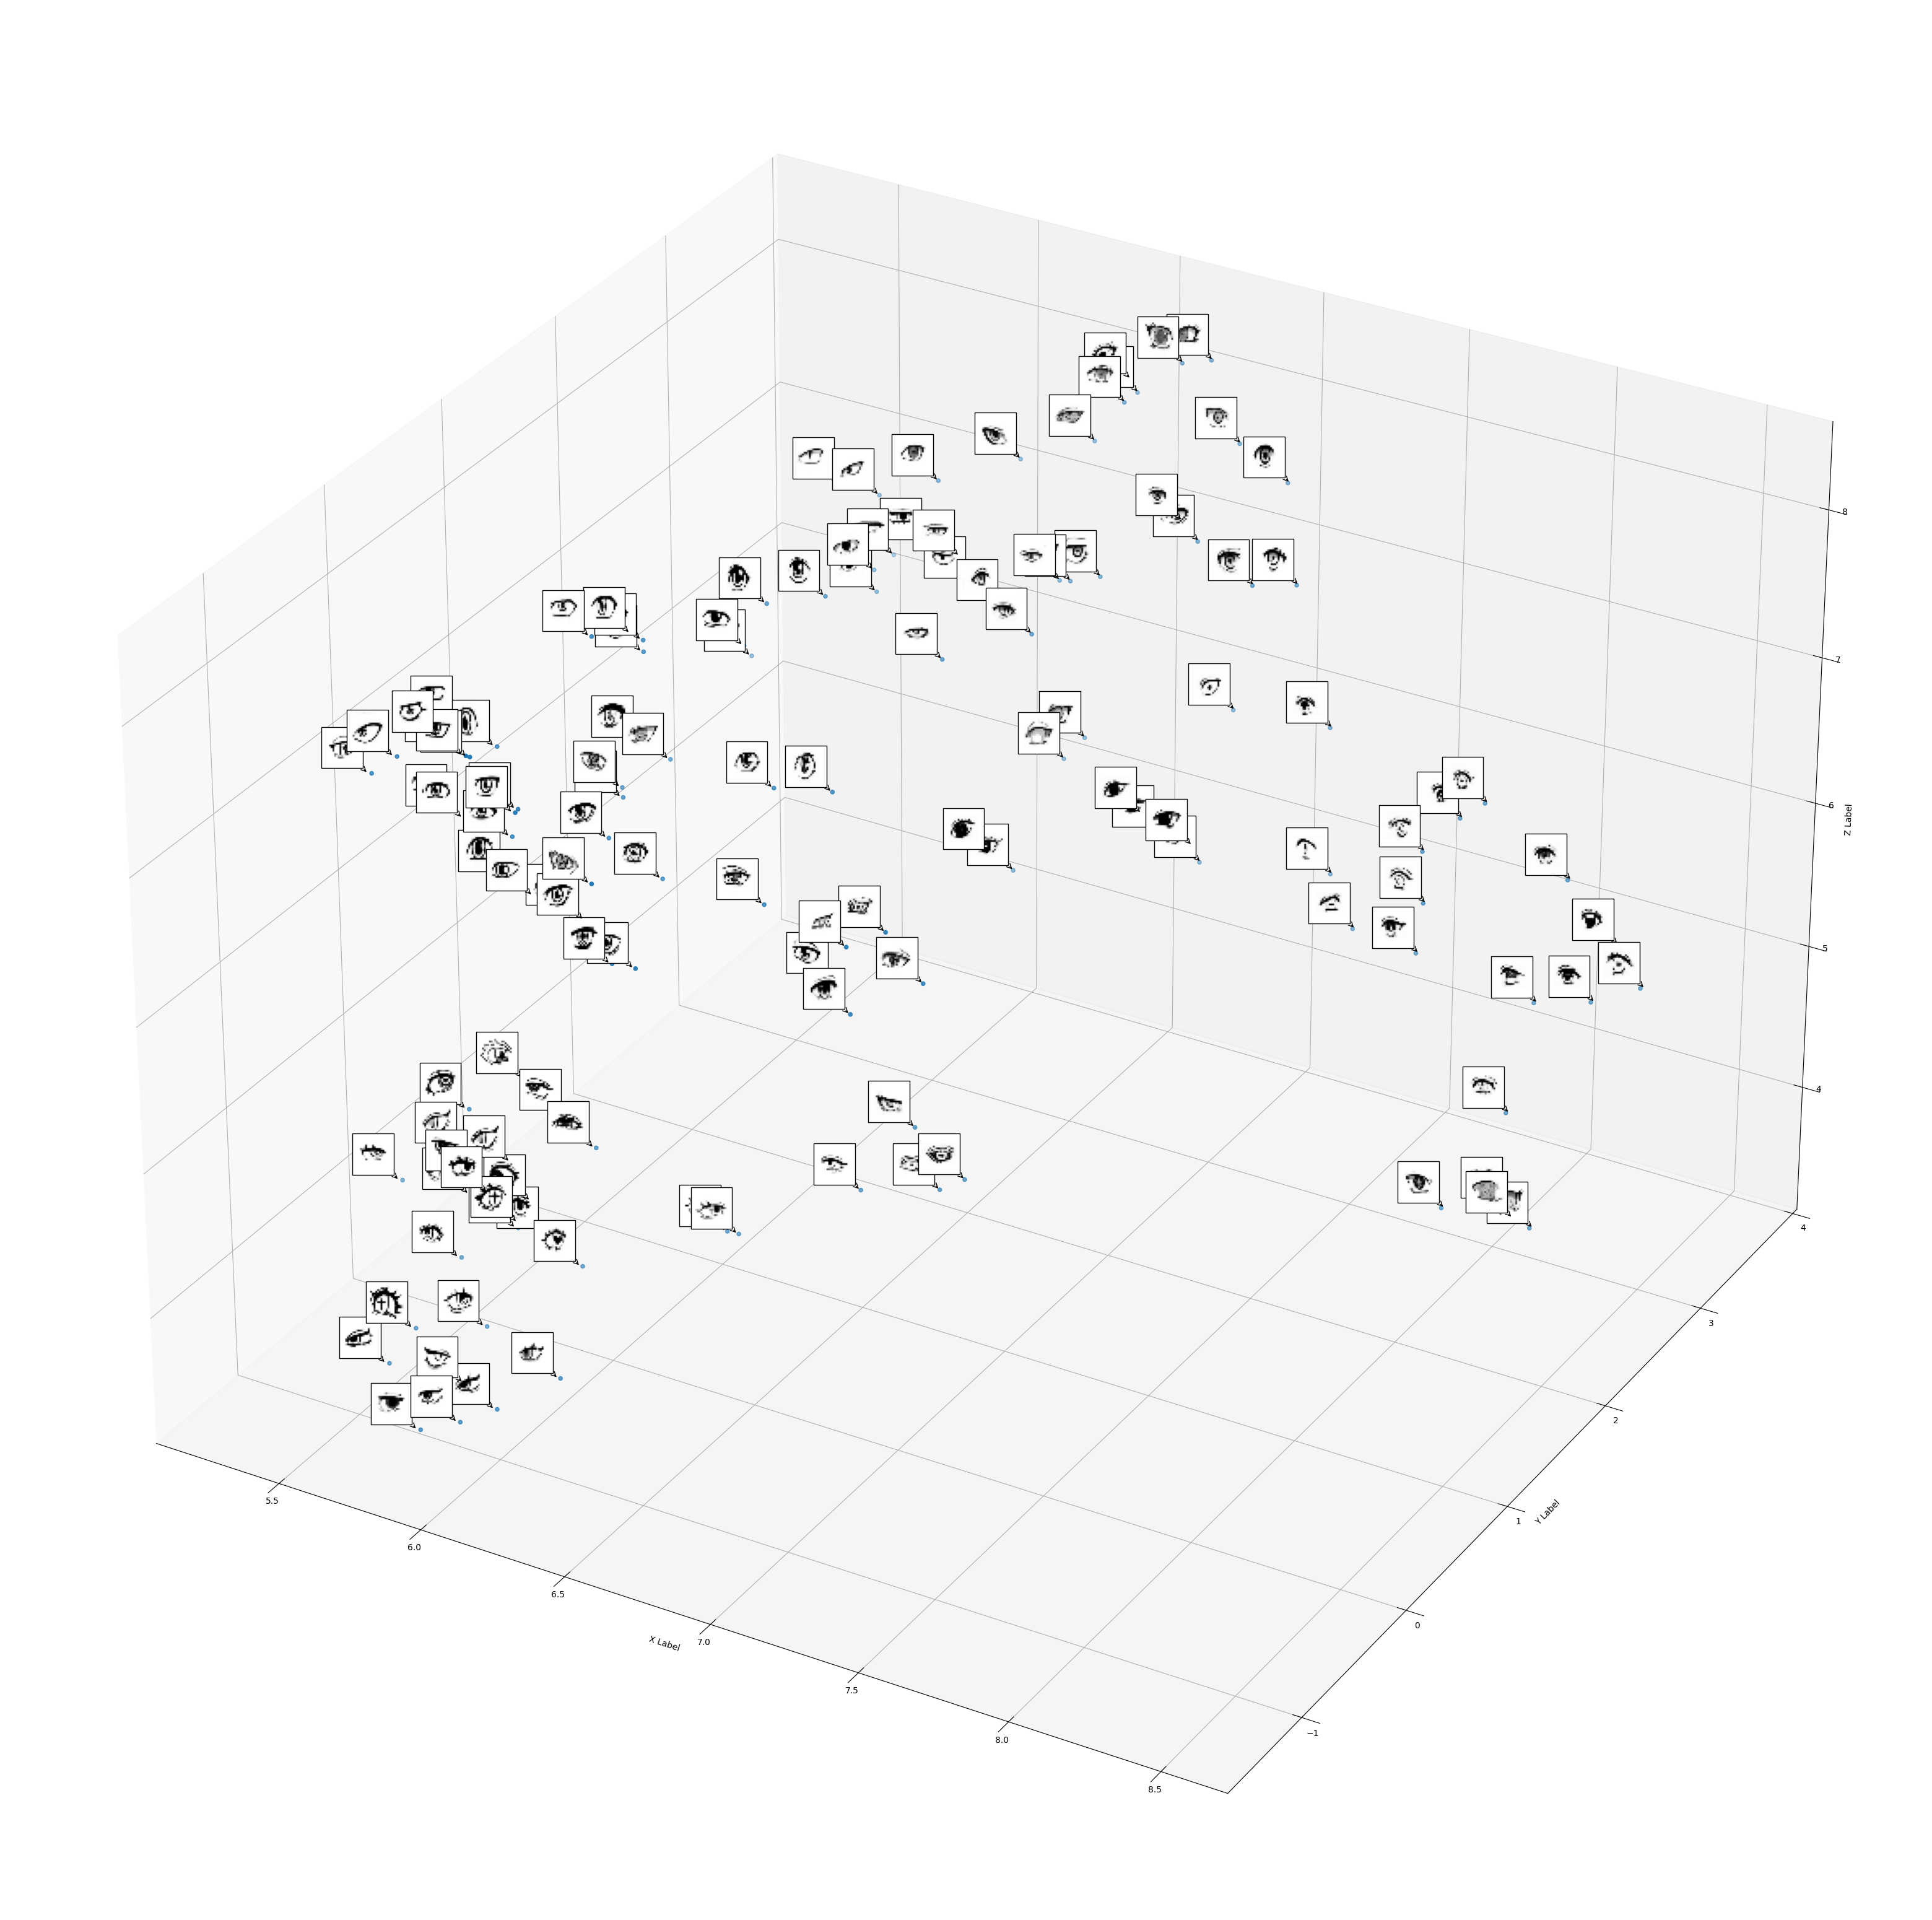

In [46]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
import matplotlib.pyplot as plt
from matplotlib import offsetbox
import numpy as np

xs = embedding[:, 0]
ys = embedding[:, 1]
zs = embedding[:, 2]

fig = plt.figure(figsize=(40,40))
ax = fig.add_subplot(111, projection=Axes3D.name)

ax.scatter(xs, ys, zs, marker="o")

# Create a dummy axes to place annotations to
ax2 = fig.add_subplot(111,frame_on=False) 
ax2.axis("off")
ax2.axis([0,1,0,1])


def proj(X, ax1, ax2):
    """ From a 3D point in axes ax1, 
        calculate position in 2D in ax2 """
    x,y,z = X
    x2, y2, _ = proj3d.proj_transform(x,y,z, ax1.get_proj())
    return ax2.transData.inverted().transform(ax1.transData.transform((x2, y2)))

def image(ax,arr,xy):
    """ Place an image (arr) as annotation at position xy """
    im = offsetbox.OffsetImage(arr, zoom=2)
    im.image.axes = ax
    ab = offsetbox.AnnotationBbox(im, xy, xybox=(-30., 30.),
                        xycoords='data', boxcoords="offset points",
                        pad=0.3, arrowprops=dict(arrowstyle="->"))
    ax.add_artist(ab)


i=-1
for s in zip(xs,ys,zs):
    i=i+1
    x,y = proj(s, ax, ax2)
    image(ax2,cv2.resize(data["image"][i], (21,21)),[x,y])

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

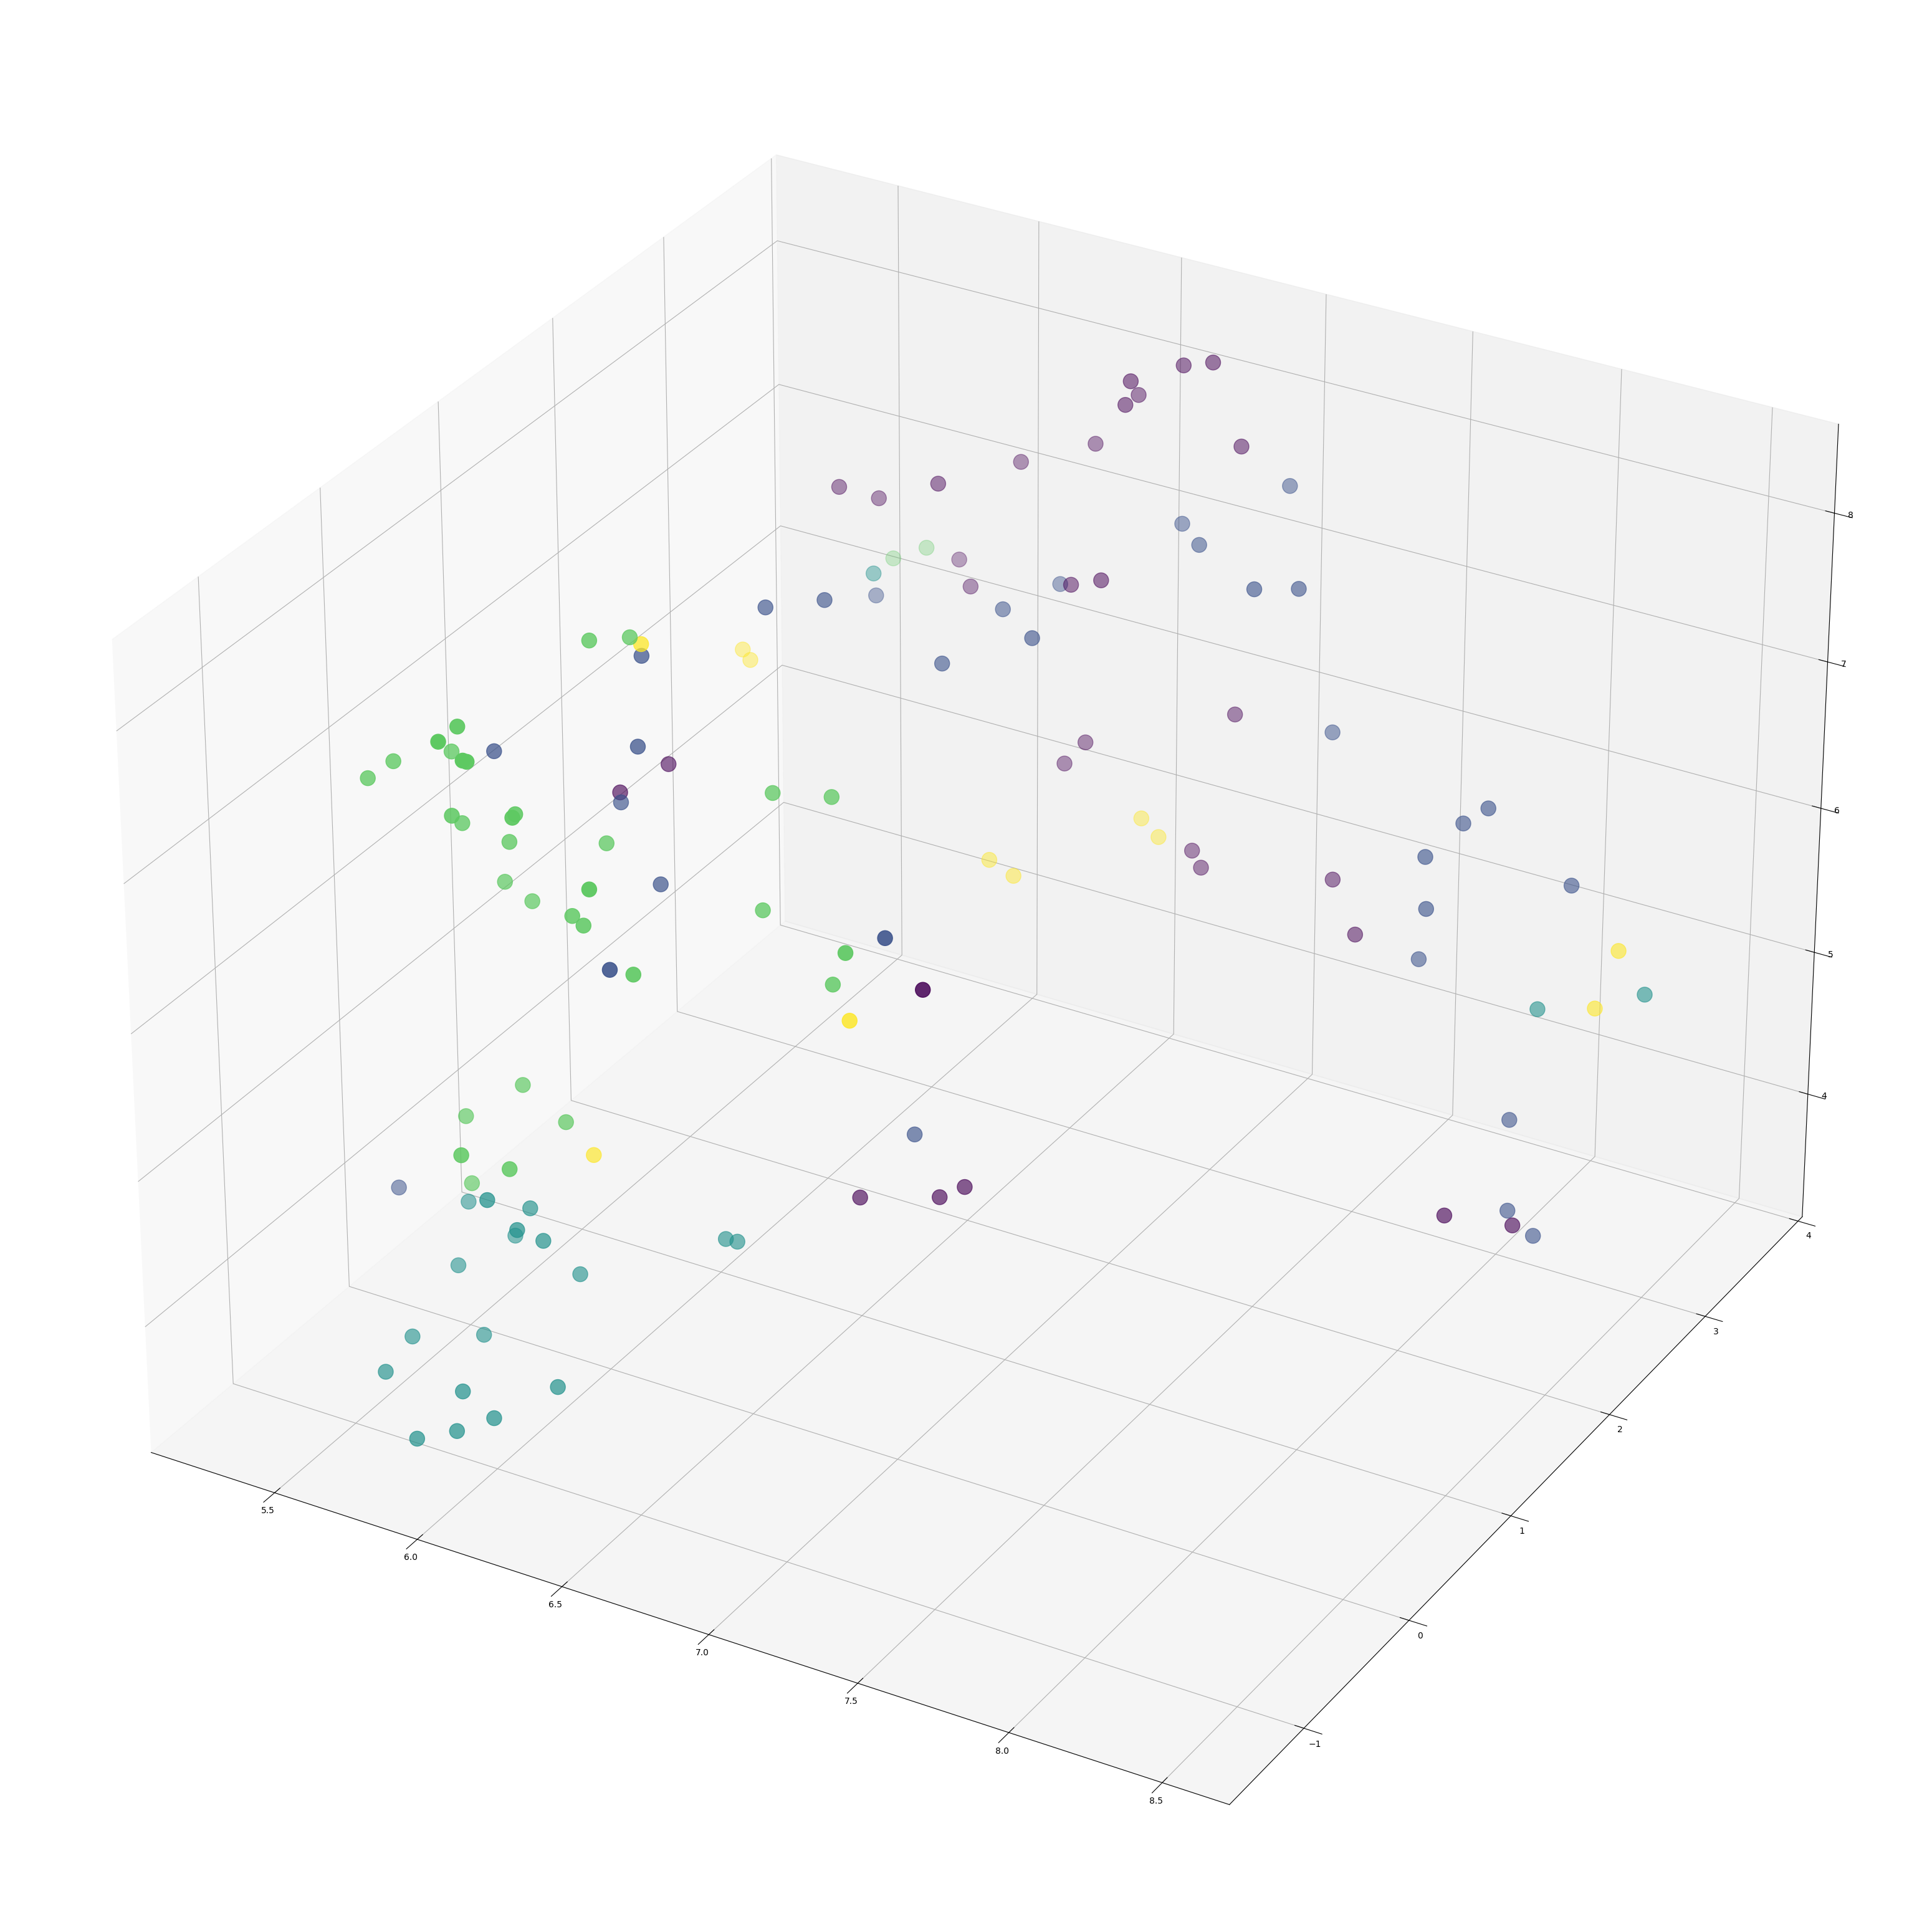

In [47]:
from matplotlib.offsetbox import AnnotationBbox

fig = plt.figure(figsize=(40, 40))
ax = fig.add_subplot(projection='3d')

ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2], c = data["cluster"], s=300)

plt.show()

In [ ]:
data["umap_reducer"]

In [34]:
data["umap_reducer"] = embedding

In [35]:
data.keys()

dict_keys(['name', 'image', 'features', 'factor', 'cluster', 'umap_reducer'])